# Deep Learning Regressor Model:

Epoch 1/50


c:\Users\chesa\OneDrive\Desktop\MLG382\CYO\MLG382_CYO_PROJ_GroupX\src\preprocess_data.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])
c:\Users\chesa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.1637 - mae: 0.8713 - val_loss: 0.6187 - val_mae: 0.6400
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9275 - mae: 0.7963 - val_loss: 0.5074 - val_mae: 0.5947
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7415 - mae: 0.7122 - val_loss: 0.4298 - val_mae: 0.5490
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6510 - mae: 0.6629 - val_loss: 0.3822 - val_mae: 0.5143
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5714 - mae: 0.6275 - val_loss: 0.3539 - val_mae: 0.4872
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5879 - mae: 0.6377 - val_loss: 0.2938 - val_mae: 0.4418
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4879 - mae: 0.5672 - val_loss: 0.2499 - val_mae: 0.4103
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4324 - mae: 0.5526 - val_loss: 0.2225 - val_mae: 0.3908
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3463 - mae: 0.4640 - val_loss: 0

Model: DeepLearningRegressor
R2 Score: 0.8543
Mean Absolute Error: 0.27
Mean Squared Error: 0.11
--------------------------------------------------
Saved model to: ../artifacts\DeepLearningRegressor.h5


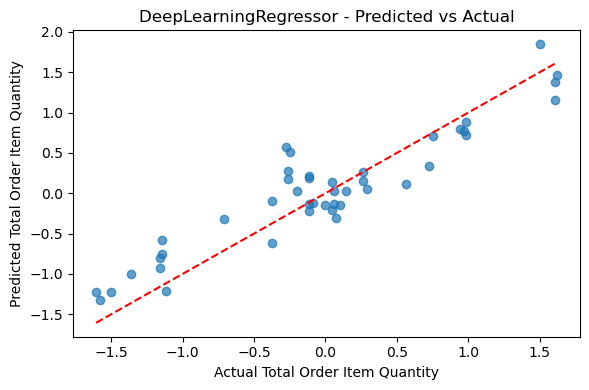

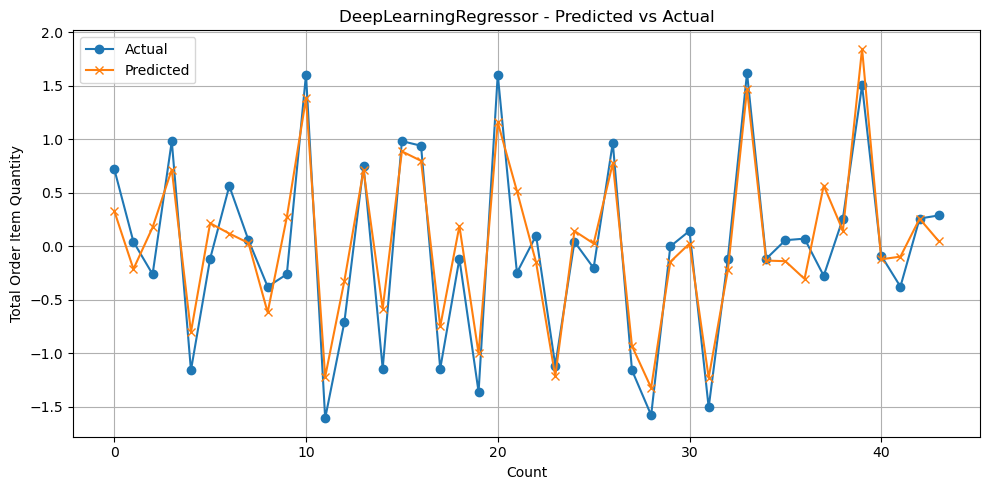

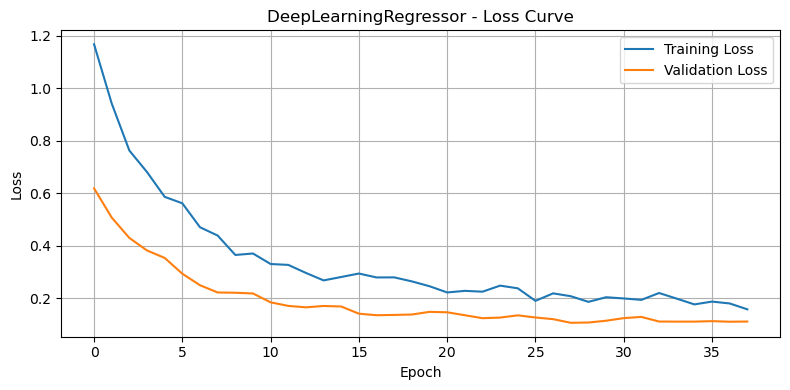

<Sequential name=sequential_1, built=True>

In [2]:
#Importing Required Libraries
import sys
import os
import numpy as np

#Allows for model to reload without reloading Kernel
import importlib 

#Python files can be used 
sys.path.append(os.path.abspath("../src"))


#preprocess_data.py file importing functions
from preprocess_data import (
    load_data, 
    iterative_outlier_removal, 
    scale_features
)

#prepare_data.py file importing functions
from prepare_data import (
    split_features_target, 
    create_train_test_split
)

#train_models.py file importing training function
from train_models import train_deep_learning_model


#Loads data for use from preprocess_data.py 
df = load_data('../data/ML_Dataset.csv')


#Selects all columns that include number properties from the dataframe
numerical_columns = df.select_dtypes(include=[np.number]).columns

#Calls the iterative outlier removal function from preprocess_data.py to remove outliers
df = iterative_outlier_removal(df, numerical_columns)

#Calls the scale features function from preprocess_data.py to scale features
df, scaler = scale_features(df, numerical_columns)


#Calls the split_features_target function from prepare_data.py to split data into features and target
X, Y = split_features_target(df)

#Calls the create_train_test_split function from prepare_data.py to split data into train and test sets
X_train, X_test, Y_train, Y_test = create_train_test_split(X, Y)


#Imports entire file for reload function
import train_models


#Calls the reload function from train_models.py to automatically reload models
importlib.reload(train_models)


#Calls the train_deep_learning_model function from train_models.py to train the deep learning model
train_deep_learning_model(X_train, X_test, Y_train, Y_test)

